<a href="https://colab.research.google.com/github/PiotrMachaj/Studies/blob/main/Kaggle_Titanic_26_05_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.kaggle.com/competitions/titanic/data?select=test.csv

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
train_df = pd.read_csv('train.csv')

In [16]:
test_df  = pd.read_csv('test.csv')

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [20]:
# Cabin to be removed - to many missing data, not necessary for training

In [21]:
train_df.drop('Cabin', axis=1, inplace=True)

In [23]:
test_df.drop('Cabin', axis=1, inplace=True)

In [24]:
test_df.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [25]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [26]:
train_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [27]:
# Missing values for Embarked to be replaced by most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [28]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [29]:
# For missing 'Age' - we'll use median for both sets
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [30]:
all_data = [train_df, test_df]

In [31]:
# New column - FamilySize + SibSp+Parch+this person
for dataset in all_data:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [32]:
# Regex to get title from Name of person
import re

In [33]:
def get_title(name):
  title_search = re.search(' ([a-z A-Z]+)\.',  name)
  if title_search:
    return title_search.group(1)
  return ''

In [34]:
#using regex method to get new values to Title column
for dataset in all_data:
  dataset['Title'] = dataset['Name'].apply(get_title)

In [35]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [36]:
# Rarely used titles we'll replace with 'Rare'

for dataset in all_data:
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [37]:
for dataset in all_data:
  dataset['Title'] = dataset['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Jonkheer', 'Capt', 'Sir', 'Don', 'the Countess', 'Lady', 'Dona'], 'Rare')

In [38]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [39]:
# Diving age into 4 groups (ranges)
for dataset in all_data:
  dataset['Age_bin'] = pd.cut(dataset['Age'], bins = [0,12, 20, 40, 150], labels = ['Child', 'Teenage', 'Adult', 'Elder'])

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,Adult


In [41]:
#Ticket for into categories
for dataset in all_data:
  dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins = [0,8, 14, 31, 120], labels = ['Low_fare', 'Median_fare', 'Average_fare', 'High_fare'])

In [42]:
#Passenger ID from train set can be removed, but we need to store one from test set
pass_id = test_df['PassengerId']
pass_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [43]:
for dataset in all_data:
  drop_column = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
  dataset.drop(drop_column, axis=1, inplace=True)

In [44]:
train_df.head()

,Survived,Pclass,Sex,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,3,male,S,2,Mr,Adult,Low_fare
1,1,1,female,C,2,Mrs,Adult,High_fare
2,1,3,female,S,1,Miss,Adult,Low_fare
3,1,1,female,S,2,Mrs,Adult,High_fare
4,0,3,male,S,1,Mr,Adult,Median_fare


In [45]:
#One Hot encoding for string variables
train_df = pd.get_dummies(train_df, columns= ['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'], prefix=['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'])

In [46]:
train_df.head()

,Survived,Pclass,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,...,Title_Mrs,Title_Rare,Age_bin_Child,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Fare_bin_Low_fare,Fare_bin_Median_fare,Fare_bin_Average_fare,Fare_bin_High_fare
0,0,3,2,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,2,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,3,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,1,1,2,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,3,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [47]:
test_df = pd.get_dummies(test_df, columns= ['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'], prefix=['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'])

In [48]:
import seaborn as sns

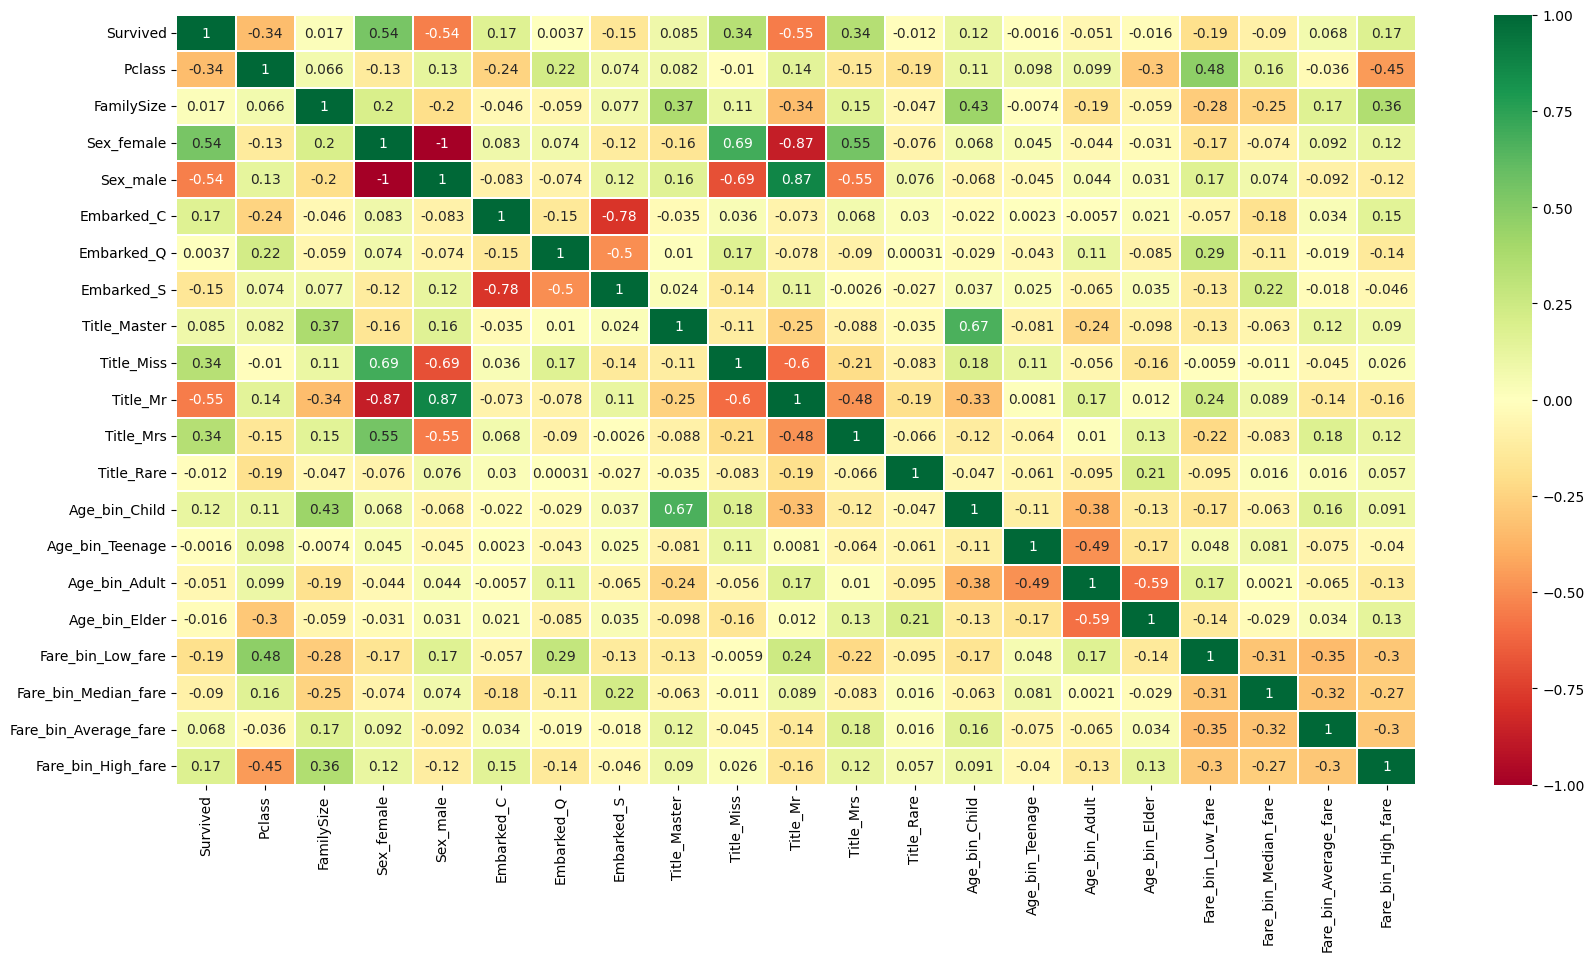

In [49]:
#Heatmap from corr matrix ,
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidth = 0.2,)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [50]:
train_X = train_df.drop('Survived', axis=1)
train_Y = train_df['Survived']

In [51]:
train_X.shape

(891, 20)

In [52]:
train_Y.shape

(891,)

In [53]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [54]:
#Building deep neural network
def titanic():
  model = models.Sequential()
  model.add(layers.Dense(units=64, activation = 'relu', input_shape = (20,)))
  model.add(layers.Dense(units=30, activation = 'relu'))
  #model.add(layers.Dense(units=32, activation = 'relu'))
  model.add(layers.Dense(units=16, activation = 'relu'))

  model.add(layers.Dense(1, activation='sigmoid'))
  #last layer has to be built this way that it returns what we expect (shape), sigmoid better for binary
  model.compile(optimizer='RMSprop', loss = 'binary_crossentropy', metrics =['accuracy'])


  return model

In [55]:
model = titanic()

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,807
Trainable params: 3,807
Non-trainable params: 0
_________________________________________________________________


In [57]:
#training & hyperparameters
history=model.fit(train_X, train_Y, batch_size=100, epochs=50, validation_split=0.1)

Epoch 1/50
9/9 [==============================] - 1s 37ms/step - loss: 0.6118 - accuracy: 0.7004 - val_loss: 0.5217 - val_accuracy: 0.7889
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5150 - accuracy: 0.7865 - val_loss: 0.4794 - val_accuracy: 0.7889
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4791 - accuracy: 0.7903 - val_loss: 0.4717 - val_accuracy: 0.7778
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4618 - accuracy: 0.7990 - val_loss: 0.4529 - val_accuracy: 0.7778
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4533 - accuracy: 0.8040 - val_loss: 0.4553 - val_accuracy: 0.7889
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4537 - accuracy: 0.8202 - val_loss: 0.4646 - val_accuracy: 0.7889
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.4471 - accuracy: 0.7990 - val_loss: 0.4422 - val_accuracy: 0.8000
Epoch 8/50
9/9 [=================

In [58]:
pred = model.predict(test_df)

14/14 [==============================] - 0s 2ms/step


In [59]:
#changing probability into 0 / 1
for i in range(len(pred)):
  if pred[i] < 0.5:
    pred[i] = 0
  else:
    pred[i] = 1

In [60]:
pred=pred.astype(int)

In [61]:
df = pd.DataFrame(pred)

In [62]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [64]:
#Saving result (preds) into dataframe
submission = pd.DataFrame({'PassengerId':pass_id, 'Survived': df[0]})

In [65]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
#saving preds to csv file
ubmission.to_csv('titanic.csv', index = False)